<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/2_2_perceptron_model_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/'\
                 'machine-learning-databases/iris/iris.data',
                 header=None)

y = df.iloc[0:100, 4].values # y is numpy array (by.df.values)
y = np.where(y == 'Iris-setosa', -1, 1)
X = np.transpose(df.iloc[0:100, [0, 2]].values)
y = np.reshape(y, (1, y.shape[0]))
# pandas의 dataframe 객체 df에 데이터셋 저장 이 후, dataframe의 iloc 메소드로 label과 feature를 추출

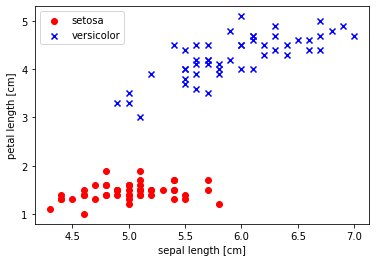

In [110]:
plt.scatter(X[0, :50], X[1, :50], color='red', marker='o', label='setosa')
plt.scatter(X[0, 50:100], X[1, 50:100], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [0]:
class perceptron(object):

  def __init__(self, learning_rate = 0.01, iter=50, random_state = 1):
    self.lr=learning_rate # 학습률
    self.iter=iter # 학습 횟수
    self.random_state=random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc=0.0, scale=0.01, size=(1, X.shape[0]+1)) # 평균0, 편차가 0.01인 분포로 weight 초기화
    self.errors = []

    for a in range(self.iter):
      error = 0
      for i in range(X.shape[1]):
        xi = np.reshape(X[:, i], (X.shape[0], 1))
        yi = np.reshape(y[:, i], (y.shape[0], 1))
        update = self.lr * (yi - self.predict(xi)) # loss, 실제 데이터와 예측 값의 차 
        self.w[0, 1:] = self.w[0, 1:] + update * xi.T # 일괄적으로 업데이트
        self.w[0, 0] += update # w[0]는 임계값을 0으로 만들어주는 특수한weight
        error += int(update != 0.0) # loss가 0이 아니면(즉, 예측이 틀리면) error 추가
      self.errors.append(error)
  
  def net_input(self, xi):
    W = self.w[0, 1:]
    W = np.reshape(W, (1, W.shape[0]))
    z = np.dot(self.w[0, 1:], xi) + self.w[0, 0]
    return z

  def predict(self, xi):
    return np.where(self.net_input(xi) >= 0.0, 1, -1)


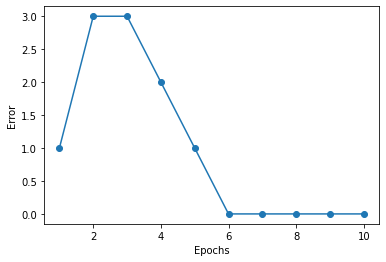

In [138]:
model = perceptron(learning_rate=0.1, iter=10)
model.fit(X, y)
plt.plot(range(1, len(model.errors)+1),
         model.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

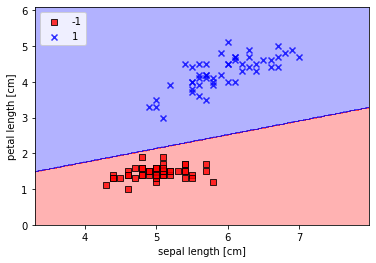

In [192]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers=('s', 'x', 'o', '^', 'v')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique: find unique elements in numpy array

  x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
  x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]))
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1.T, xx2.T, Z.T, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[0, y[0, :]==cl],
                y=X[1, y[0, :]==cl],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
    
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()